# Titanic DataSet - To predict whether a passenger on the Titanic would have survived or not. Required Output = [PassengerId - Survived]

In [502]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [503]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')
print('Training Data Shape and First Five Rows:',train.shape,'\n', train.head())
print('\n','Testing Data Shape and First Five Rows:',test.shape,'\n', test.head())

Training Data Shape and First Five Rows: (891, 12) 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4 

In [504]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harknett, Miss. Alice Phoebe",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#Features that can be dropped Straightaway are:
1. PassengerId : Not Needed for analysis
2. Name: Not effecting the results
3. Ticket: Ticket No. not directly related to Survived People

In [505]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [506]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#Adding Columns SibSp and Parch to find total relatives including the person ---> Total_Rel

In [507]:
train['Total_Rel']=train['SibSp']+train['Parch']+1
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test['Total_Rel']=test['SibSp']+test['Parch']+1
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [508]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   Fare       891 non-null    float64
 5   Cabin      204 non-null    object 
 6   Embarked   889 non-null    object 
 7   Total_Rel  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


#Finding and Replacing Missing Values

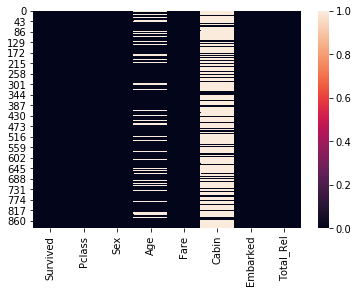

In [509]:
train.isnull().sum()
sns.heatmap(train.isnull())
plt.show()

#Age and Embarked can be replaced by Mean and Mode, but Cabin contains huge no. of null values. Better to drop it.

In [510]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [511]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)


In [512]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Total_Rel  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


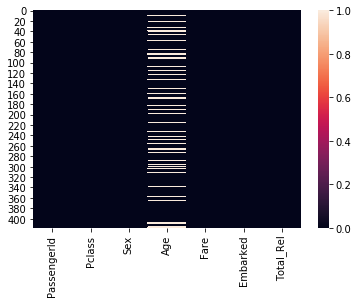

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   Total_Rel    418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [513]:
sns.heatmap(test.isnull())
plt.show()
test.info()

In [514]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

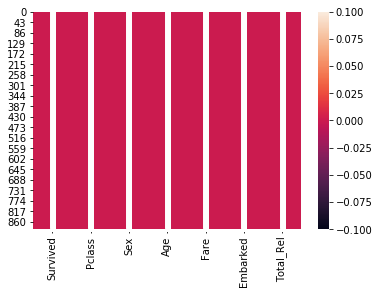

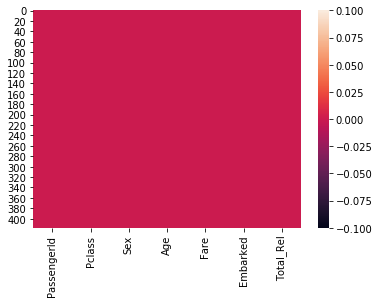

In [515]:
sns.heatmap(train.isnull(),annot=True)
plt.show()
sns.heatmap(test.isnull())
plt.show()

1.Pclass

In [516]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

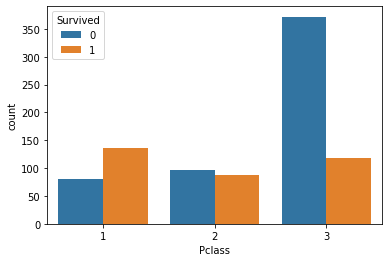

In [517]:
sns.countplot(train['Pclass'],hue=train['Survived'])

##Above Plot indicates that 3rd Class Passengers had a lot of deaths as compared to Survived

In [518]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


2. Sex

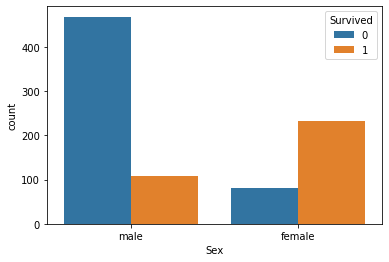

In [519]:
sns.countplot(train['Sex'],hue=train['Survived'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex']=le.fit_transform(test['Sex'])

In [520]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,0,3,1,22.0,7.2500,S,2
1,1,1,0,38.0,71.2833,C,2
2,1,3,0,26.0,7.9250,S,1
3,1,1,0,35.0,53.1000,S,2
4,0,3,1,35.0,8.0500,S,1


3. Age

In [521]:
train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

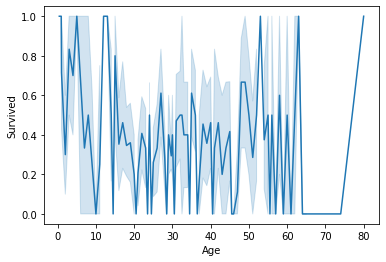

In [522]:
sns.lineplot(train['Age'],train['Survived'])

#Classifying into Age Groups will be better to analyze:
>         0-30: Class 1
>        31-60: Class 2
> more than 60: Class 3

In [523]:
l=0
for a in train['Age']:
    if (a<=30):
        train['Age'][l]=0
    elif (a>30) and (a<=60):
        train['Age'][l]=1
    else:
        train['Age'][l]=2
    l=l+1
    
m=0
for a in test['Age']:
    if (a<=30):
        test['Age'][m]=0
    elif (a>30) and (a<=60):
        test['Age'][m]=1
    else:
        test['Age'][m]=2
    m=m+1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_laun

In [524]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,0,3,1,0.0,7.2500,S,2
1,1,1,0,1.0,71.2833,C,2
2,1,3,0,0.0,7.9250,S,1
3,1,1,0,1.0,53.1000,S,2
4,0,3,1,1.0,8.0500,S,1


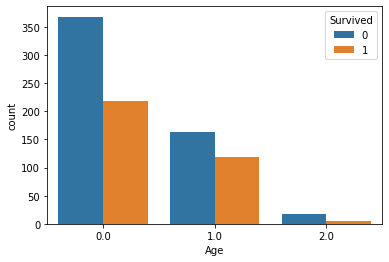

In [525]:
sns.countplot(train['Age'],hue=train['Survived'])

4. Embarked - Label encoding Embarked so that we can Operations

In [526]:
le=LabelEncoder()
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])

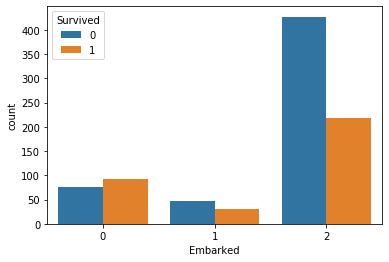

In [527]:
sns.countplot(train['Embarked'],hue=train['Survived'])

5. Fare

In [528]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

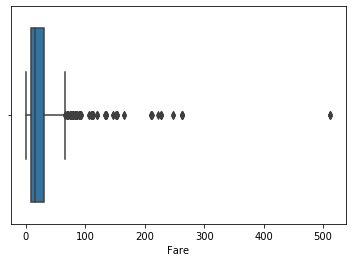

In [529]:
sns.boxplot(train.Fare)

(891, 7)
(825, 7)


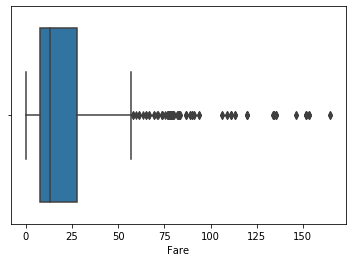

In [530]:
from scipy.stats import zscore
z_score=abs(zscore(train))
print(train.shape)
train=train[(z_score<3).all(axis=1)]
print(train.shape)
sns.boxplot(train['Fare'])

(array([485., 171.,  37.,  46.,  35.,  18.,  11.,   4.,   9.,   9.]),
 array([  0.     ,  16.48667,  32.97334,  49.46001,  65.94668,  82.43335,
         98.92002, 115.40669, 131.89336, 148.38003, 164.8667 ]),
 <a list of 10 Patch objects>)

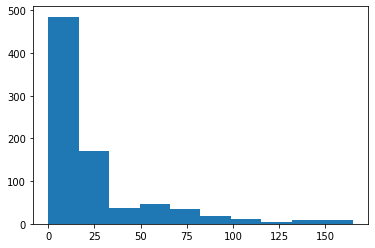

In [531]:
plt.hist(train.Fare)

In [532]:
df_x=train.drop('Survived',axis=1)
y=train['Survived']

In [533]:
df_x.head()

,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,3,1,0.0,7.2500,2,2
1,1,0,1.0,71.2833,0,2
2,3,0,0.0,7.9250,2,1
3,1,0,1.0,53.1000,2,2
4,3,1,1.0,8.0500,2,1


In [534]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [535]:
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [536]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,0.811805,0.728431,-0.701329,-0.629678,0.586769,0.259678
1,-1.636967,-1.372813,1.425864,1.536147,-1.954358,0.259678
2,0.811805,-1.372813,-0.701329,-0.606847,0.586769,-0.621944
3,-1.636967,-1.372813,1.425864,0.921126,0.586769,0.259678
4,0.811805,0.728431,1.425864,-0.602619,0.586769,-0.621944


In [537]:
test_ss=sc.fit_transform(test)
test_ss=pd.DataFrame(test_ss,columns=test.columns)
test_ss

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,-1.727912,0.873482,0.755929,0.825044,-0.498407,-0.470915,-0.553443
1,-1.719625,0.873482,-1.322876,0.825044,-0.513274,0.700767,0.105643
2,-1.711337,-0.315819,0.755929,2.649746,-0.465088,-0.470915,-0.553443
3,-1.703050,0.873482,0.755929,-0.999657,-0.483466,0.700767,-0.553443
4,-1.694763,0.873482,-1.322876,-0.999657,-0.418471,0.700767,0.764728
...,...,...,...,...,...,...,...
413,1.694763,0.873482,0.755929,0.825044,-0.494448,0.700767,-0.553443
414,1.703050,-1.505120,-1.322876,0.825044,1.313753,-1.642598,-0.553443
415,1.711337,0.873482,0.755929,0.825044,-0.508792,0.700767,-0.553443
416,1.719625,0.873482,0.755929,0.825044,-0.494448,0.700767,-0.553443


# Model Selection

In [538]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,r2_score,mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [539]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(LogisticRegression(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  94  is:  0.40217391304347816


0.07979759645793796

In [540]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=DecisionTreeClassifier(criterion='gini')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  90  is:  0.4371345029239767


0.12560887096774181

In [541]:
from sklearn.svm import SVC
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=SVC(kernel='poly')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(SVC(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  94  is:  0.40217391304347816


0.1920601676154332

In [542]:
max_r_score=0
final_rstate=42
from sklearn.naive_bayes import GaussianNB
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=GaussianNB()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GaussianNB(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  94  is:  0.37726449275362317


0.08011132194813406

In [543]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=AdaBoostClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(AdaBoostClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  94  is:  0.35235507246376807


0.13109234661606575

In [544]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(RandomForestClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  56  is:  0.3757881462799496


0.1870975648323845

In [545]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GradientBoostingClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  80  is:  0.38849500483403154


0.21795390575585066

In [546]:
from sklearn.neighbors import KNeighborsClassifier
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(KNeighborsClassifier(n_neighbors=10),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  76  is:  0.4682565259426361


0.13584203036053127

# Gradient Boosting Classifier with r_state = 80 Gives the Best Results.

In [547]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.2)
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [548]:
print('r2 Score is:', r2_score(y_test,y_pred))

r2 Score is: 0.38849500483403154


In [549]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.37335497772755005


In [550]:
print('AUC_Score:',roc_auc_score(y_test,y_pred))

AUC_Score: 0.8412020625201418


<function matplotlib.pyplot.show(*args, **kw)>

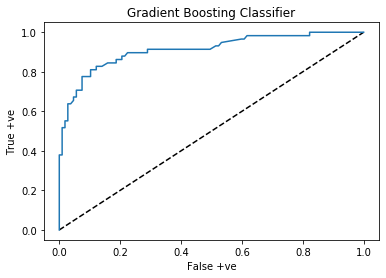

In [551]:
y_pred_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Gradient Boosting Classifier')
plt.show

# TEST

In [552]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,892,3,1,1.0,7.8292,1,1
1,893,3,0,1.0,7.0000,2,2
2,894,2,1,2.0,9.6875,1,1
3,895,3,1,0.0,8.6625,2,1
4,896,3,0,0.0,12.2875,2,3


In [553]:
test_ss.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Total_Rel
0,-1.727912,0.873482,0.755929,0.825044,-0.498407,-0.470915,-0.553443
1,-1.719625,0.873482,-1.322876,0.825044,-0.513274,0.700767,0.105643
2,-1.711337,-0.315819,0.755929,2.649746,-0.465088,-0.470915,-0.553443
3,-1.703050,0.873482,0.755929,-0.999657,-0.483466,0.700767,-0.553443
4,-1.694763,0.873482,-1.322876,-0.999657,-0.418471,0.700767,0.764728


In [572]:
model=GradientBoostingClassifier()
model.fit(x,y)
test_data = test_ss.drop("PassengerId", axis=1).copy()
from sklearn.externals import joblib
joblib.dump(model,'Titanic.pkl')
file=joblib.load('Titanic.pkl')
prediction=file.predict(test_data)

In [573]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [574]:
submission = pd.read_csv('submission.csv')
submission.head()



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [575]:
submission['Survived'].value_counts()

0    275
1    143
Name: Survived, dtype: int64

# End